# Example notebook showing Q-factor calculations

## Load in needed packages

In [1]:
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
import os
import glob

## Set up nicer looking plots

In [2]:
matplotlib.style.use('seaborn-ticks')
matplotlib.rc('lines',linewidth=2)
matplotlib.rc('axes',labelsize=23)
matplotlib.rc('figure',figsize=(12,8))
matplotlib.rc('xtick',labelsize=30)
matplotlib.rc('ytick',labelsize=30)

## import our package

In [3]:
import rvprec

## Load and scan the pre-computed tables

In [8]:
qfiles = rvprec.index_qs()
ffiles = rvprec.index_fs()

## try some examples

Let's try calculating the expected precision for HPF on a 3000K star with J=8

First, load up the tables:

In [10]:
qdat,fdat = rvprec.get_data(3000,5.0,qfiles,ffiles)

Each of these is a python dictionary, look at the available keys:

In [13]:
for i in qdat.keys():
    print(i)
print('')
for i in fdat.keys():
    print(i)

teff
resols
grav
chunk_lower_lims
chunk_upper_lims
vsinis
fname
tell_levels
q_dict

teff
grav
chunk_lower_lims
chunk_upper_lims
photlam_0
fname


Can check what's in each one by, for example:

In [15]:
print(qdat['resols'])

[  2000  10000  30000  50000  55000  60000  80000 100000 110000 120000
      0]


Let's make a quick plot to see what's there:

Text(0,0.5,u'Normalized Flux -or- Information content')

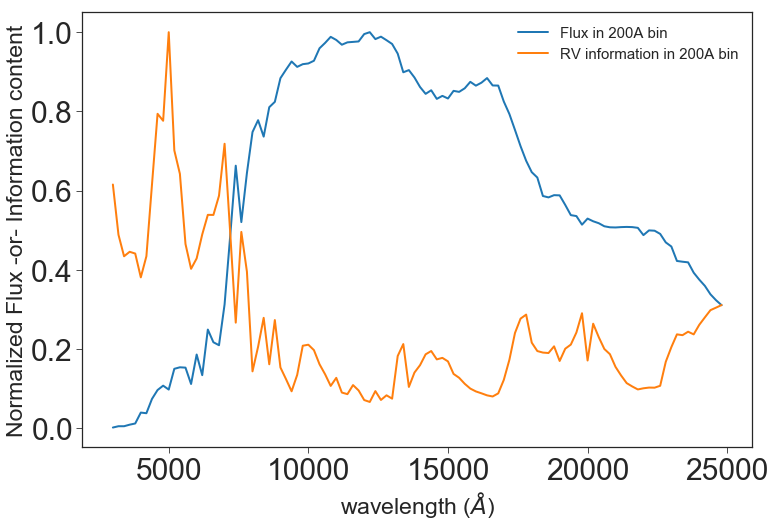

In [32]:
wavelengths = []
fluxes = []
qfactors = []
for i in qdat['chunk_lower_lims']:
    wavelengths.append(i)
    fluxes.append(fdat['photlam_0']['johnson,v'][i])
    qfactors.append(qdat['q_dict'][50000][3][0][i])
plot(wavelengths,fluxes/amax(fluxes),label='Flux in 200A bin')
plot(wavelengths,qfactors/amax(qfactors),label='RV information in 200A bin')
legend(loc='best',fontsize=15)
xlabel(r'wavelength ($\AA$)')
ylabel('Normalized Flux -or- Information content')

Let's see what happens when rvprec.calc_prec does its job, using approximate parameters for HPF:

In [17]:
oo = rvprec.calc_prec(qdat,fdat,8000,13000,55000,3.,4.,eff=.02,mag=8,magtype='johnson,j',
             exptime_s=300.,tell=.95,mask_factor=0.1,sampling_pix_per_resel=3.,beam_height_pix=9.,rdn_pix=6.)

Using 
 wl_1: 8000 
 wl_2: 13200 
 Resol: 55000 
 vsini: 3.0 
 tell: 0.95 



What's in the output? Can check the code or just look here:

In [19]:
for i in oo.keys():
    print i

qs
fs
ws
sns
dv_all_photon
dv
dv_all
dv_photon
sns_photon


Overall precision in m/s is:

In [21]:
print(oo['dv_all'])

1.6444360125641801


## A much more complicated example

Here, we want to estimate the 1m/s limiting V-magnitude for the NEID optical spectrograph.

In [34]:
# want 1m/s limiting vmag for 1hr

# look at a range of Teff's
teffs = arange(2800.,6000,100)
vlim = zeros_like(teffs)

# limiting V will be between 9 and 16, so these will be the values to consider
vmags = linspace(9.,16,10)

# iterate over each star
for i in range(len(teffs)):
    # calculate precision for each of a range of Vmags, then interpolate on prec vs V @ 1m/s
    precs = zeros_like(vmags)
    teff1 = teffs[i]
    print teff1
    
    # load in data
    qdat,fdat = rvprec.get_data(teffs[i],5.0,qfiles,ffiles)
    
    # loop over each vmag
    for j in range(len(vmags)):
        oo = rvprec.calc_prec(qdat,fdat,4000,9000,100000,3.,3.5/2.,eff=.1,mag=vmags[j],magtype='johnson,v',
             exptime_s=3600.,tell=.95,mask_factor=0.1,sampling_pix_per_resel=5.,beam_height_pix=5.,rdn_pix=4.)
        precs[j] = oo['dv_all']
    vlim[i] = interp(1.,precs,vmags)

2800.0
Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

2900.0
Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

4000.0
Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

5100.0
Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using 
 wl_1: 4000 
 wl_2: 9200 
 Resol: 100000 
 vsini: 3.0 
 tell: 0.95 

Using

Text(0.5,1,u'tell_filter=0.95, aperture=3.5m, eff= flat 10%, rdn=4e, vsini=3km/s')

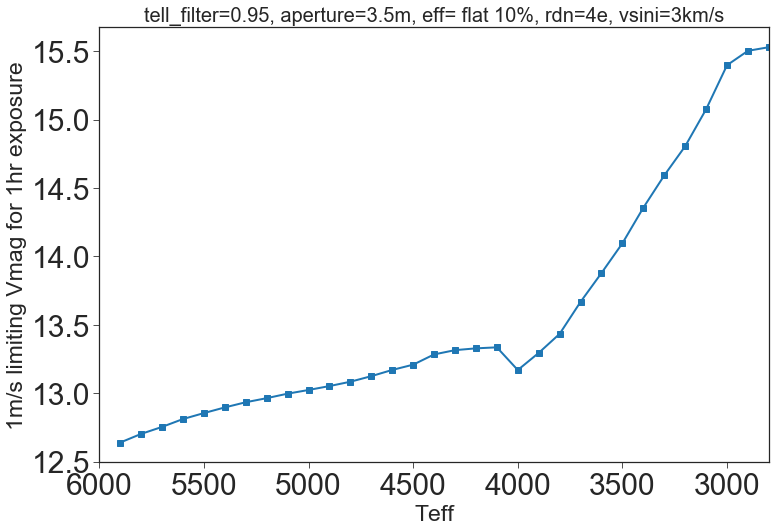

In [36]:
plot(teffs,vlim,'s-')
xlim(6000,2800)
xlabel('Teff')
ylabel('1m/s limiting Vmag for 1hr exposure')
title('tell_filter=0.95, aperture=3.5m, eff= flat 10%, rdn=4e, vsini=3km/s',fontsize=20)